Mean Squared Error: 65624045.235433765
R^2 Score: 0.9632961490113602


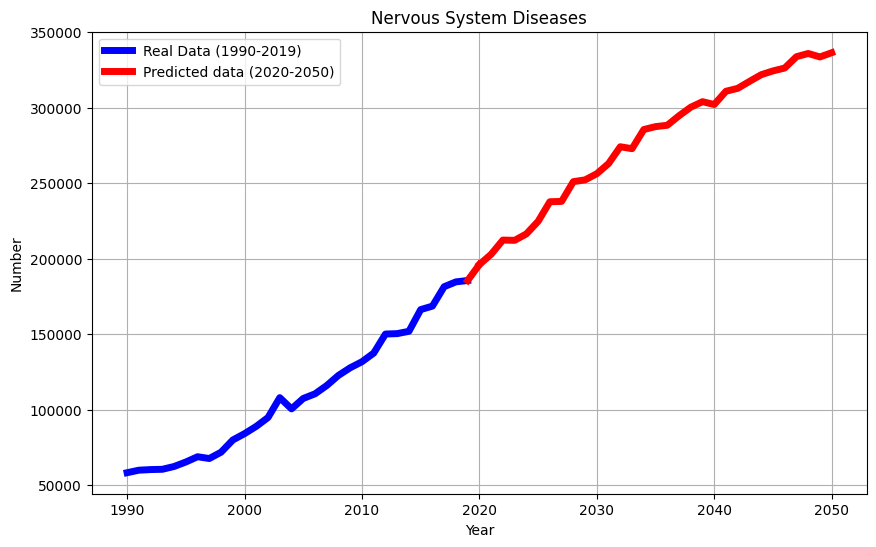

In [14]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import Ridge
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt

# Carica i dati
train_data = pd.read_csv( '/content/drive/MyDrive/Colab Notebooks/data.csv')

# Assumi che il CSV di addestramento abbia le colonne 'feature1', 'feature2', 'feature3', 'feature4' e 'target'
X_train = train_data[['Anthropogenic Forcing', 'Temperature Anomaly', 'CO2', 'CH4']]
y_train = train_data['Nervous System Diseases']
X=X_train
y=y_train
# Dividi i dati in set di addestramento e test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

# Crea una pipeline che include la scalatura delle feature, l'espansione polinomiale e la regressione Ridge
pipeline = make_pipeline(
    StandardScaler(),
    PolynomialFeatures(degree=1, include_bias=False),
    Ridge(alpha=3.5)
)

# Addestra il modello
pipeline.fit(X_train, y_train)

# Fai delle previsioni sui dati di test
y_pred = pipeline.predict(X_test)

# Valuta il modello
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')

colors=['crimson','forestgreen','royalblue','orange']
plt.rcParams['lines.linewidth'] = 5

# Carica i dati da un secondo file CSV per fare previsioni
predict_data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/dati2050.csv')

# Assumi che il CSV di previsione abbia le colonne 'feature1', 'feature2', 'feature3', 'feature4'
X_predict = predict_data[['Anthropogenic Forcing', 'Temperature Anomaly', 'CO2', 'CH4']]
predictions = pipeline.predict(X_predict)
predict_data = pd.DataFrame(predictions, columns=['Predicted Nervous System Diseases'])

# Aggiungi le previsioni al DataFrame di input
predict_data['Nervous System Diseases'] = predictions
predict_data.to_csv('predictions2050Reg.csv', index=False)

x1 = np.arange(1990, 2020)
x2 = np.arange(2020, 2051)
x3 = np.arange(2019,2021)

nuovo_array = np.array([y.at[29], predict_data.at[0, 'Predicted Nervous System Diseases']])

# Traccia le rette in sequenza
plt.figure(figsize=(10, 6))
plt.plot(x1,y, label='Real Data (1990-2019)', color='blue')
plt.plot(x2,predictions, label='Predicted data (2020-2050)', color='red')
plt.plot(x3,nuovo_array , color='red')
plt.xlabel('Year')
plt.ylabel('Number')
plt.title('Nervous System Diseases')

plt.legend()
plt.grid(True)
plt.show()
